In [1]:
from LIMxCMBL.cross_spectrum import *
from LIMxCMBL.init import *
from LIMxCMBL.kernels import get_f_Kkappa, get_f_KI, get_f_KILo, apply_window

In [2]:
zmin = 2.0
zmax = 2.5
chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))

In [3]:
print(zmin, zmax, chimin, chimax)

2.0 2.5 5319.735377755262 5978.911518337892


In [4]:
f_Kkappa = get_f_Kkappa()
Lambda = 0.01 # 1 / cMpc, usual cut for HI

In [5]:
a_of_chibs = ccl.scale_factor_of_chi(cosmo, chibs)
z_of_chibs = 1/a_of_chibs - 1

In [6]:
ILok_no_window = np.zeros((len(ells), len(chibs)), dtype=np.float128)
ILok           = np.zeros((len(ells), len(chibs)), dtype=np.float128)

In [7]:
from tqdm import trange

100%|██████████| 256/256 [02:19<00:00,  1.83it/s]


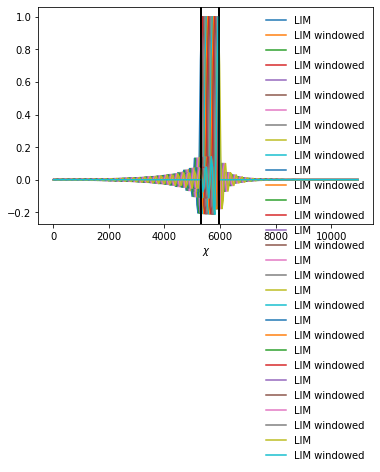

In [8]:
for chi_idx in trange(len(chibs)):
    chi = chibs[chi_idx]
    f_KLIMLo   = get_f_KILo(external_chi = chi, Lambda=Lambda)
    f_KLIMLo_windowed = apply_window(f_K = f_KLIMLo,
                                     chimin = chimin,
                                     chimax = chimax)
    
    if(chi > chimin and chi < chimax):
        plt.plot(chibs, f_KLIMLo(chibs)/np.max(f_KLIMLo(chibs)), label = 'LIM')
        plt.plot(chibs, f_KLIMLo_windowed(chibs)/np.max(f_KLIMLo_windowed(chibs)), label = 'LIM windowed')
        plt.legend(frameon=False)
        plt.xlabel('$\chi$')
        plt.axvline(chimin, c='k')
        plt.axvline(chimax, c='k')
        
    ILok_no_window[:, chi_idx] = d_chib_integral(f_KLIMLo, f_Kkappa)
    ILok[:, chi_idx]           = d_chib_integral(f_KLIMLo_windowed, f_Kkappa)

In [9]:
c1 = plt.cm.rainbow(np.linspace(0, 1, len(ells)))[::-1]
c2 = plt.cm.rainbow(np.linspace(0, 1, len(chibs)))

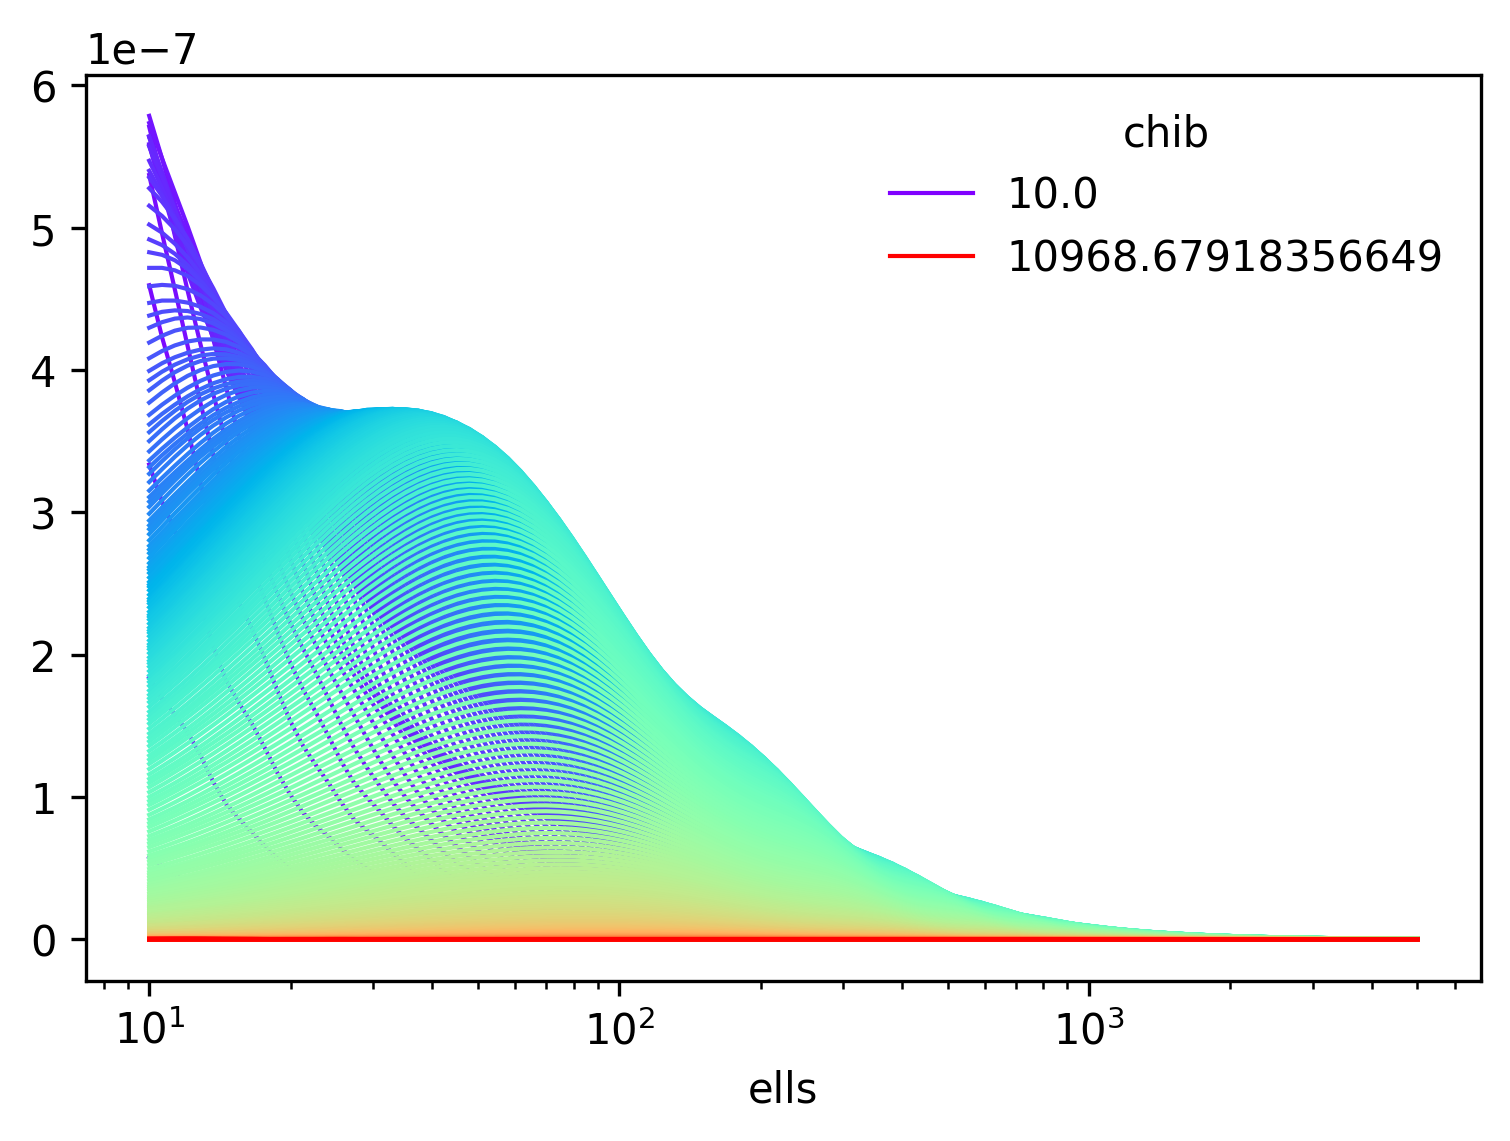

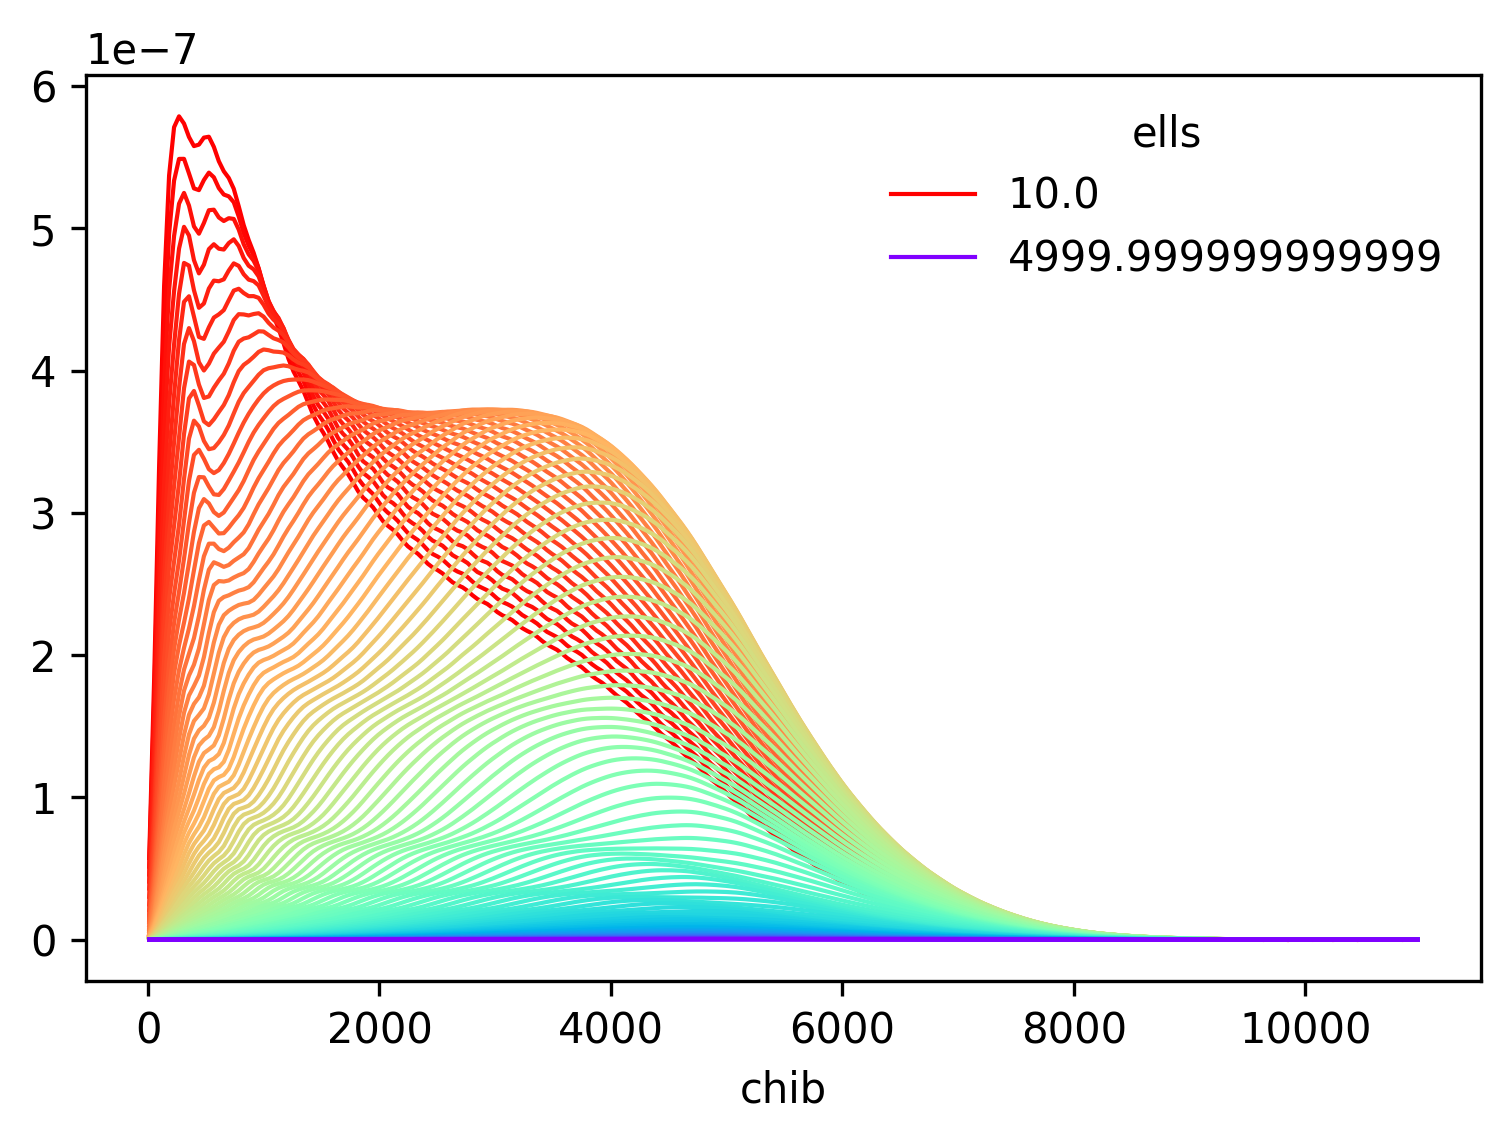

In [10]:
plt.figure(dpi = 300)
for chib_idx, c in enumerate(c2):
    plt.plot(ells, 
             ILok_no_window[:,chib_idx],
             lw = 1,
             label=chibs[chib_idx] if (chib_idx ==0 or chib_idx == len(c2)-1) else None, 
             c=c)
plt.xlabel('ells')
plt.xscale('log')
plt.legend(frameon=False, title='chib')
plt.show()

plt.figure(dpi = 300)

for ell_idx, c in enumerate(c1):
    plt.plot(chibs, 
             ILok_no_window[ell_idx], 
             lw = 1,
             label=ells[ell_idx] if (ell_idx ==0 or ell_idx == len(c1)-1) else None, 
             c=c)
plt.xlabel('chib')
plt.legend(frameon=False, title='ells')
plt.show()


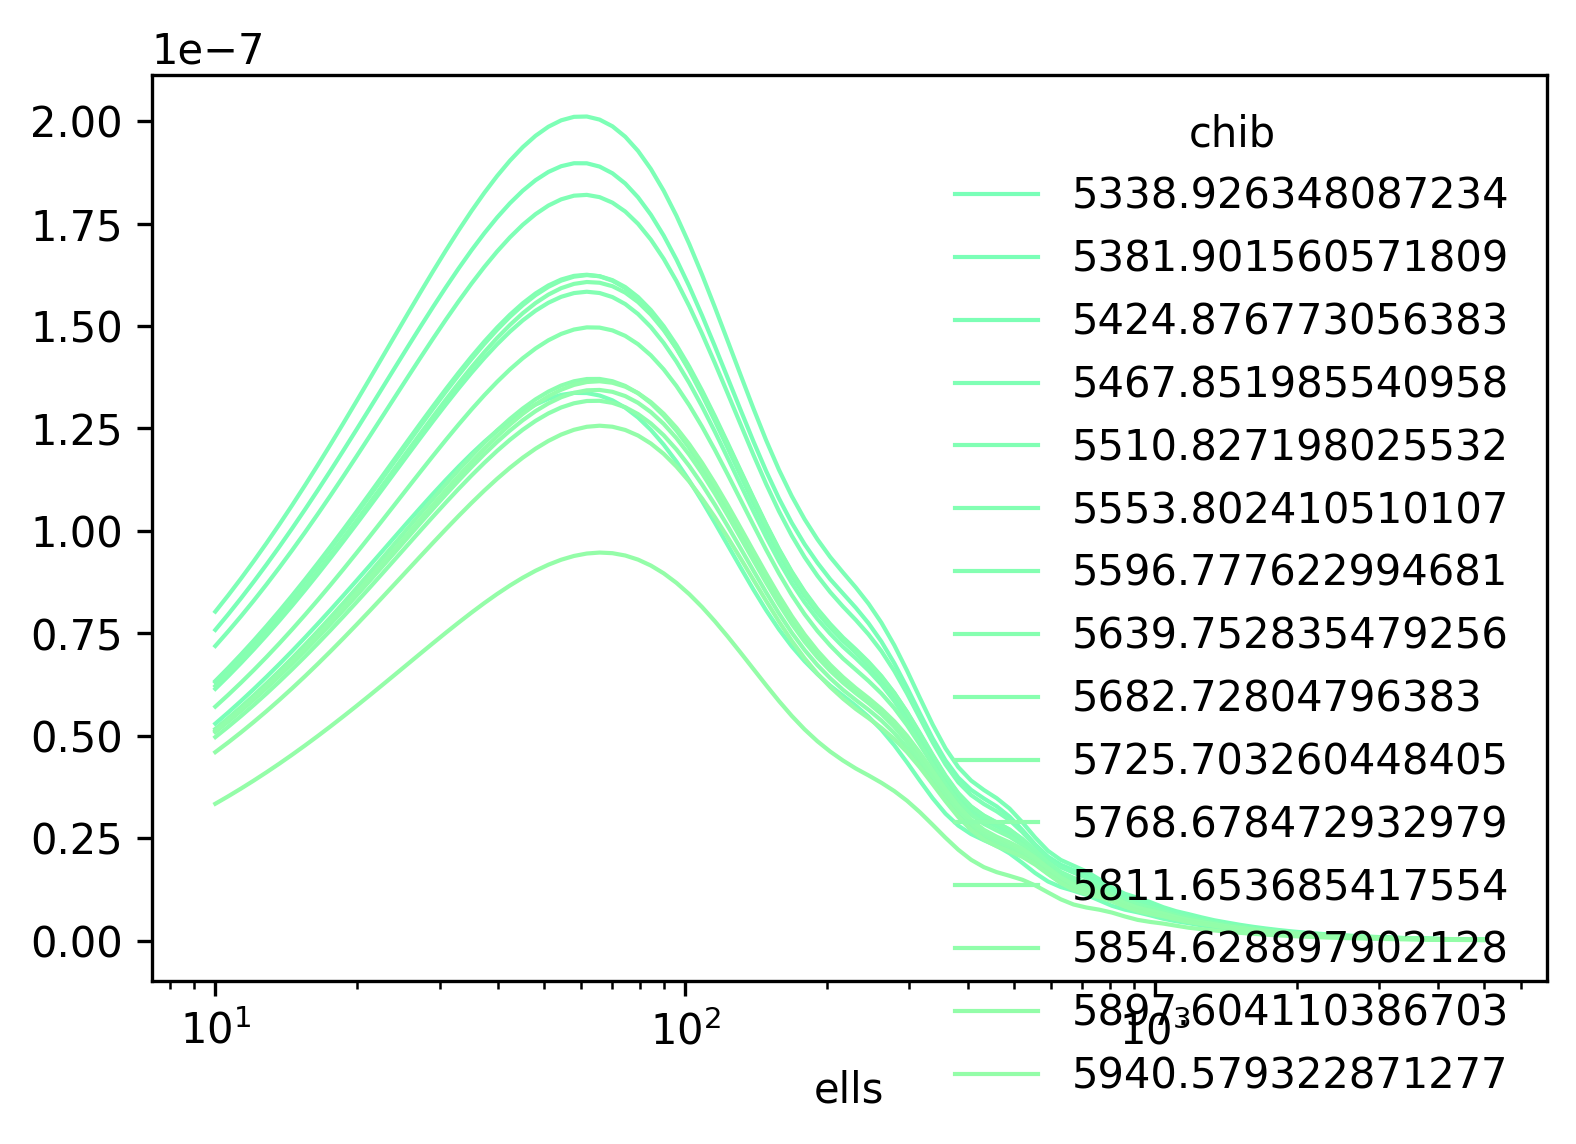

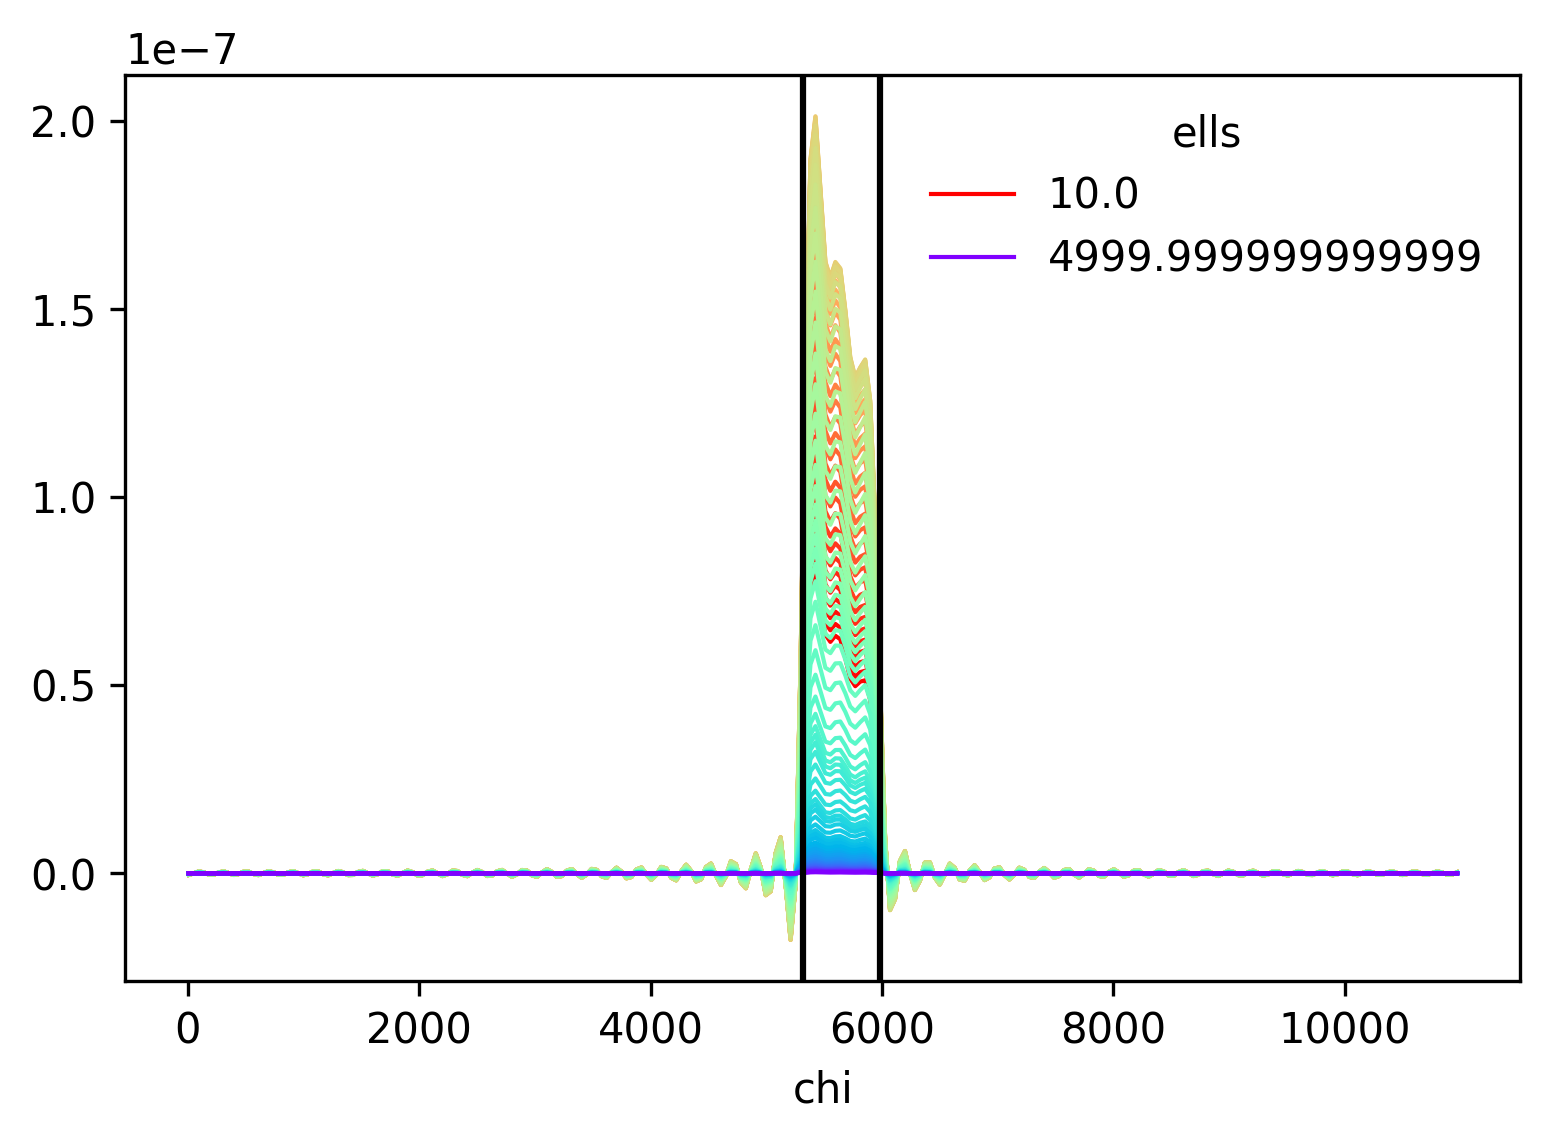

In [11]:
plt.figure(dpi = 300)
for chib_idx, c in enumerate(c2):
    if(chibs[chib_idx] < chimin or chibs[chib_idx] > chimax):
        continue
    plt.plot(ells, 
             ILok[:,chib_idx],
             lw = 1,
             label=chibs[chib_idx], 
             c=c)
plt.xlabel('ells')
plt.xscale('log')
plt.legend(frameon=False, title='chib')
plt.show()

plt.figure(dpi = 300)

for ell_idx, c in enumerate(c1):
    plt.plot(chibs, 
             ILok[ell_idx], 
             lw = 1,
             label=ells[ell_idx] if (ell_idx ==0 or ell_idx == len(c1)-1) else None, 
             c=c)
plt.xlabel('chi')
plt.axvline(chimin, c='k')
plt.axvline(chimax, c='k')
plt.legend(frameon=False, title='ells')
plt.show()


In [12]:
from matplotlib import colors


/tmp/ipykernel_9978/3281021095.py:9: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in cs.collections:


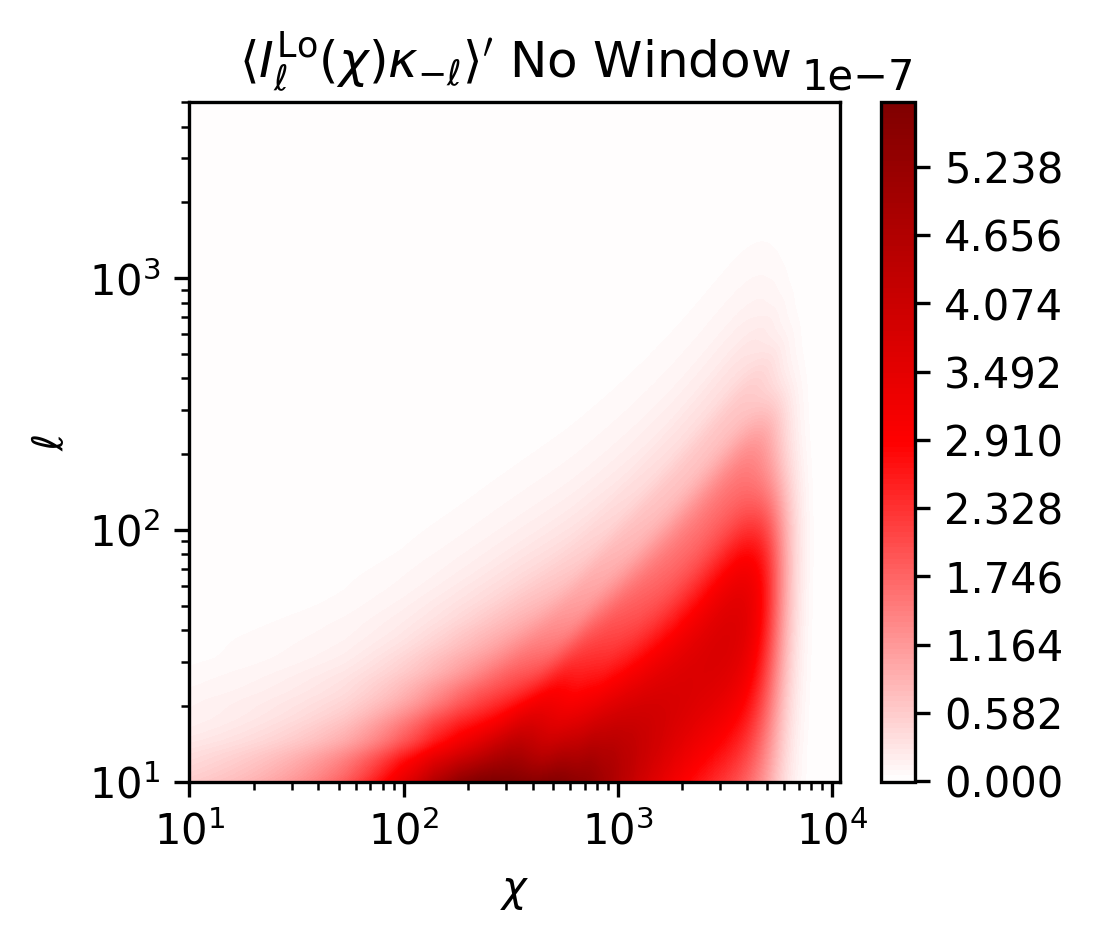

In [13]:
plt.figure(figsize=(3.5,3), dpi=300, facecolor='w')
cs = plt.contourf(chibs, ells, ILok_no_window, levels=2**10,
                  cmap='seismic',
                  norm=colors.TwoSlopeNorm(vmin=ILok_no_window.min(), vcenter=0, vmax=ILok_no_window.max()))
plt.yscale('log')
plt.xlabel(r'$\chi$')
plt.ylabel(r'$\ell$')

for c in cs.collections:
    c.set_rasterized(True)


plt.title(r"$\langle I_{ \ell}^{\sf Lo}(\chi) \kappa_{- \ell}\rangle'$ No Window")

plt.colorbar()
plt.xscale('log')
plt.savefig('figures/002.001.ILokappa_no_window.pdf', bbox_inches = 'tight')

/tmp/ipykernel_9978/2473619185.py:9: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in cs.collections:


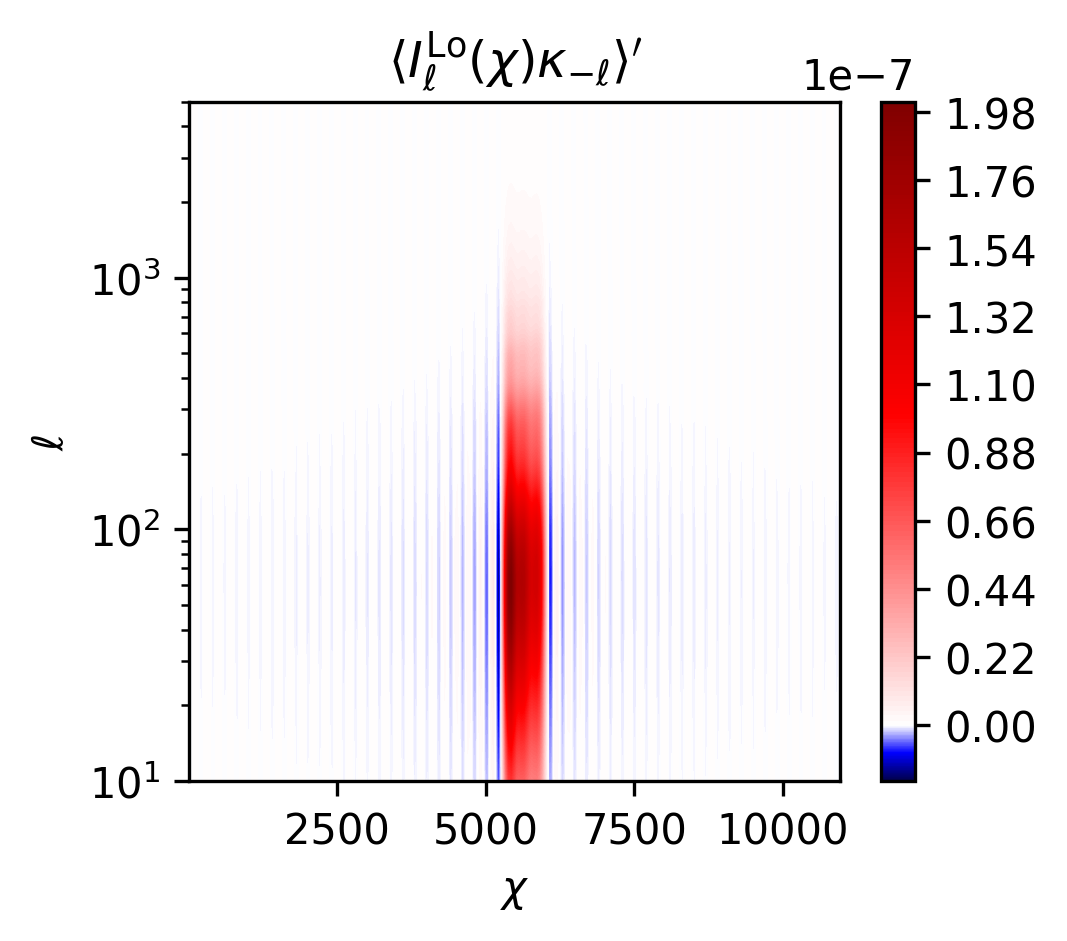

In [15]:
plt.figure(figsize=(3.5,3), dpi=300, facecolor='w')
cs = plt.contourf(chibs, ells, ILok, levels=2**10,
                  cmap='seismic',
                  norm=colors.TwoSlopeNorm(vmin=ILok.min(), vcenter=0, vmax=ILok.max()))
plt.yscale('log')
plt.xlabel(r'$\chi$')
plt.ylabel(r'$\ell$')

for c in cs.collections:
    c.set_rasterized(True)


plt.title(r"$\langle I_{ \ell}^{\sf Lo}(\chi) \kappa_{- \ell}\rangle'$")

plt.colorbar()
# plt.xscale('log')
plt.savefig('figures/002.001.ILokappa.pdf', bbox_inches = 'tight')